In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import missingno as msno
import re

In [2]:
df = pd.read_csv("../data/raw/drugs_side_effects_drugs_com.csv")

In [3]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [6]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [7]:
df.shape

(2931, 17)

In [8]:
print(df.isnull().sum())

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [9]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

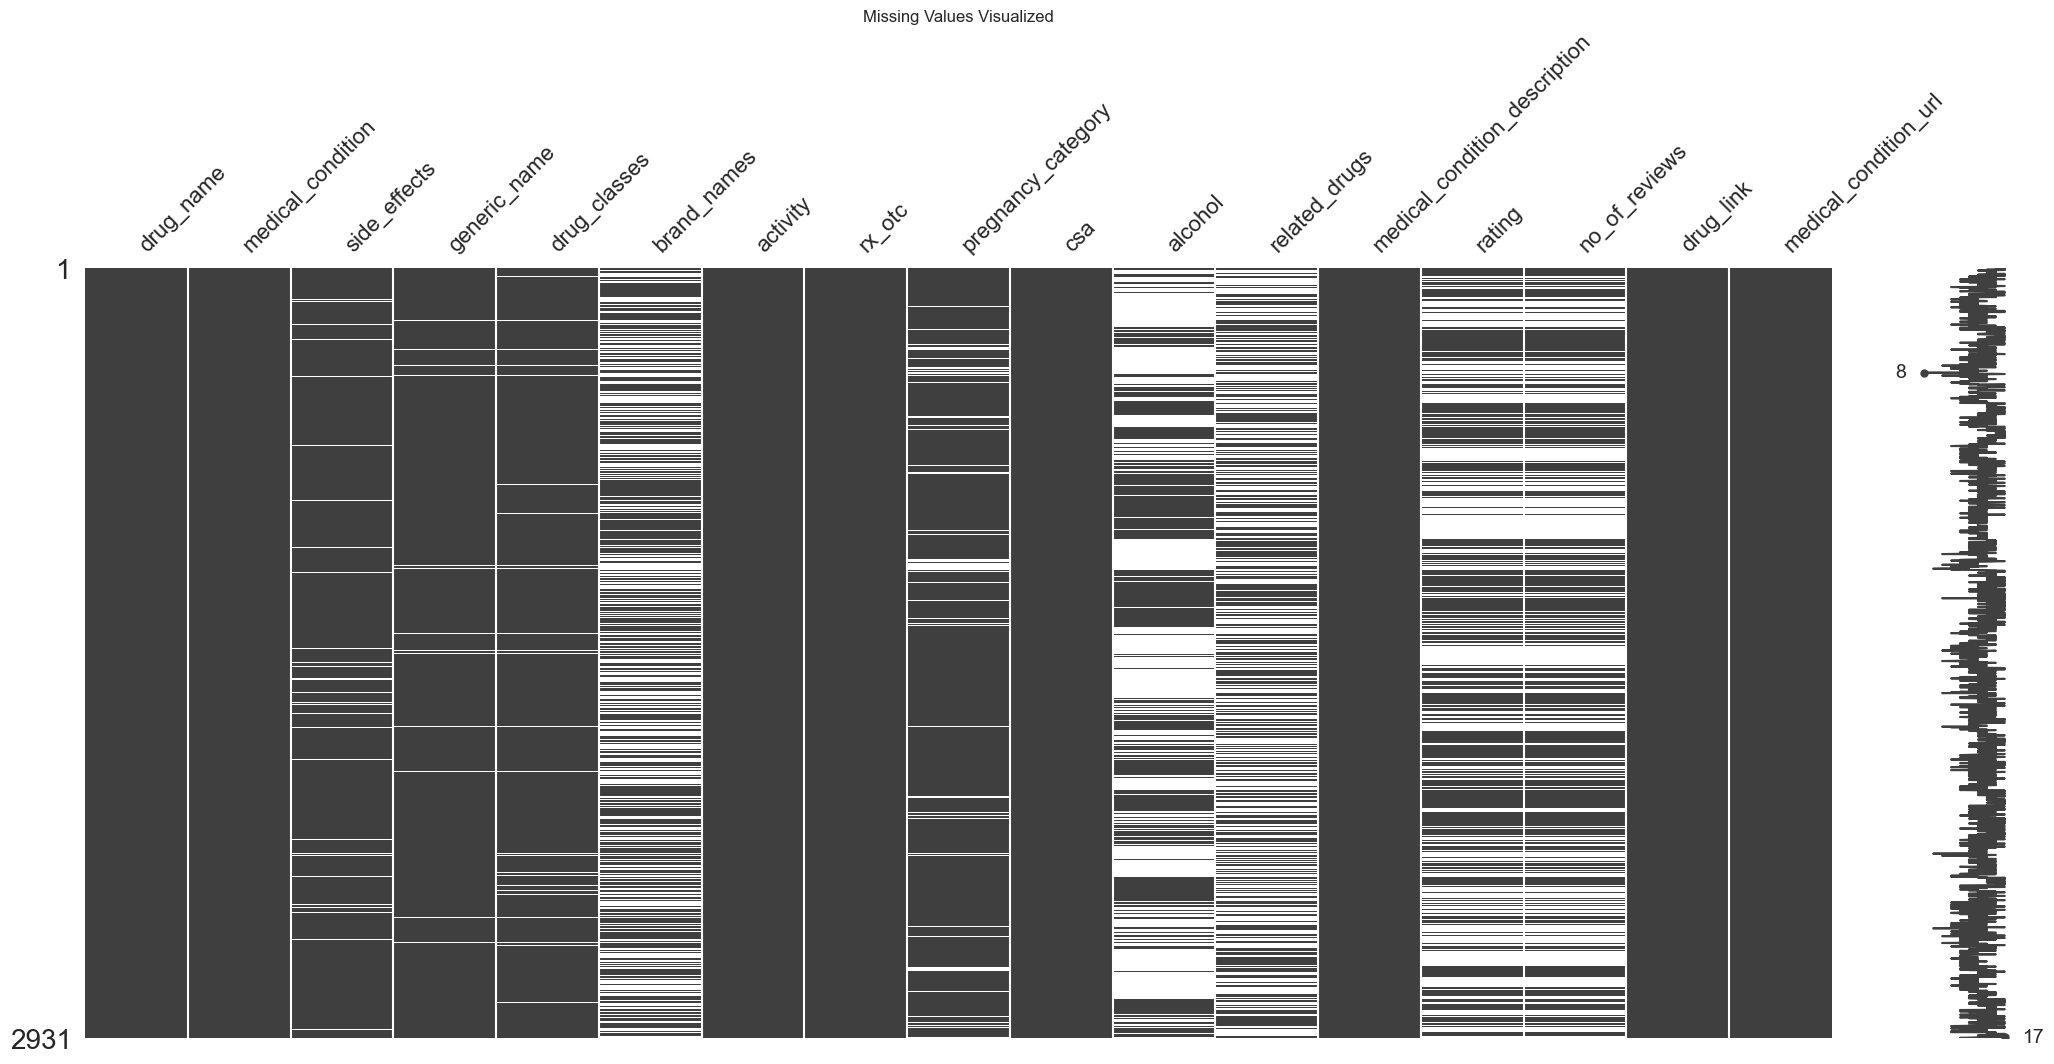

In [10]:
msno.matrix(df)
plt.title("Missing Values Visualized")
plt.show()

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(2931, 17)

In [13]:
df.dropna(subset=['medical_condition', 'side_effects'], inplace=True)

In [14]:
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['no_of_reviews'] = df['no_of_reviews'].fillna(0)

In [15]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [16]:
df['clean_side_effects'] = df['side_effects'].apply(clean_text)

In [17]:
df['side_effect_length'] = df['clean_side_effects'].apply(lambda x: len(x.split()))

In [18]:
display(df['side_effect_length'].describe())

count    2807.000000
mean      175.749198
std       137.736797
min        11.000000
25%        96.000000
50%       145.000000
75%       206.000000
max      2294.000000
Name: side_effect_length, dtype: float64

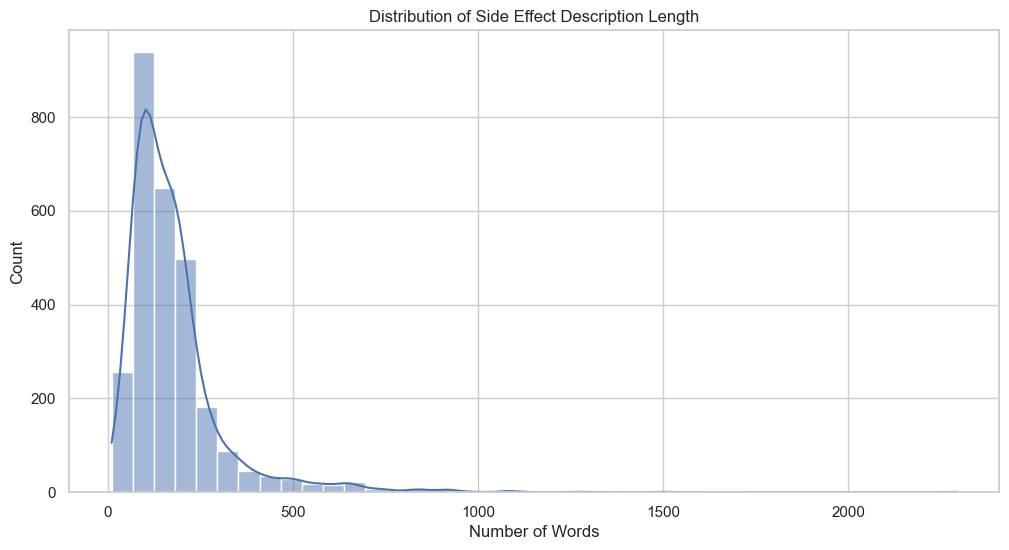

In [19]:
sns.histplot(df['side_effect_length'], bins=40, kde=True)
plt.title("Distribution of Side Effect Description Length")
plt.xlabel("Number of Words")
plt.show()

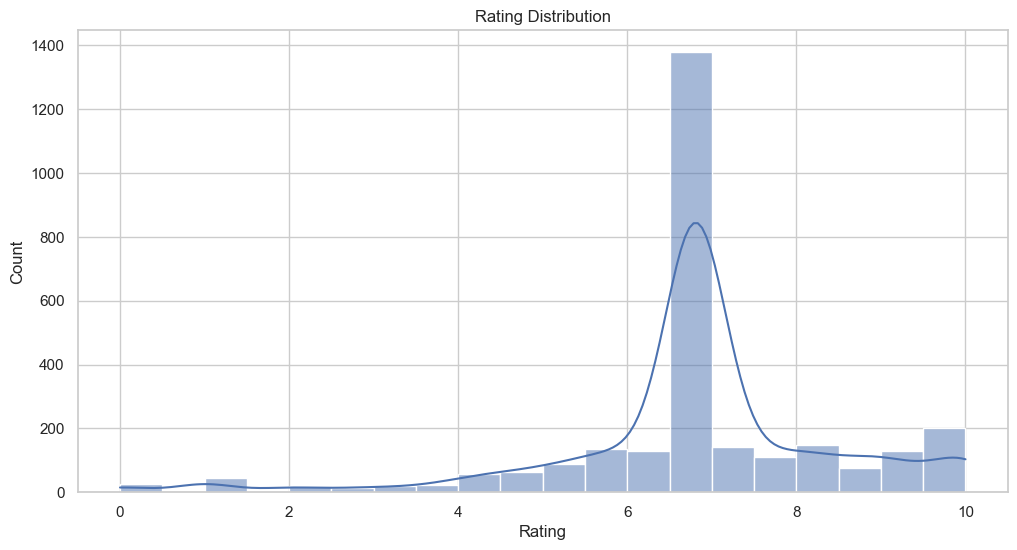

In [20]:
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_3576\586556986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='magma')


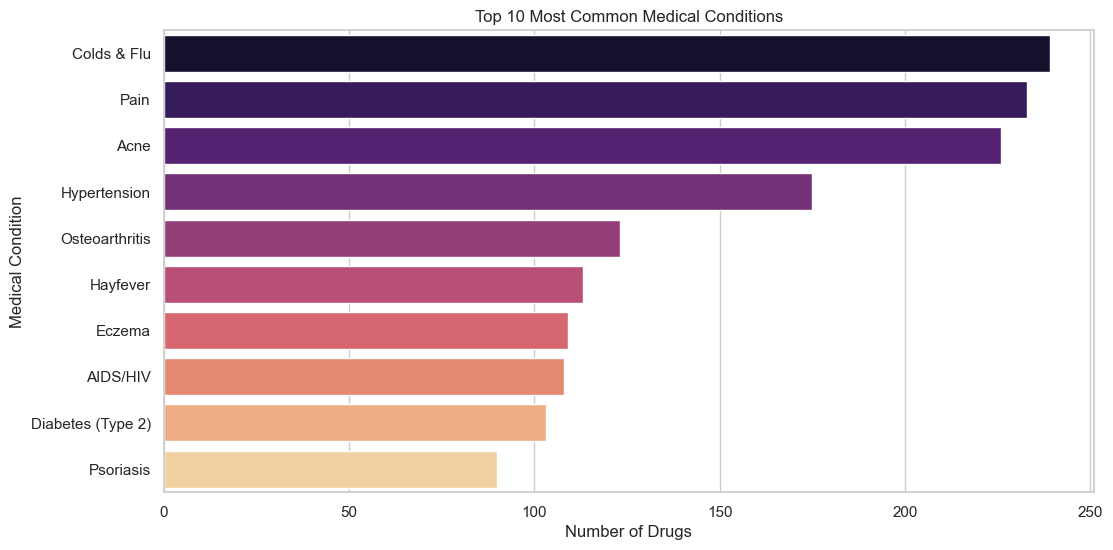

In [21]:
top_conditions = df['medical_condition'].value_counts().nlargest(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='magma')
plt.title("Top 10 Most Common Medical Conditions")
plt.xlabel("Number of Drugs")
plt.ylabel("Medical Condition")
plt.show()

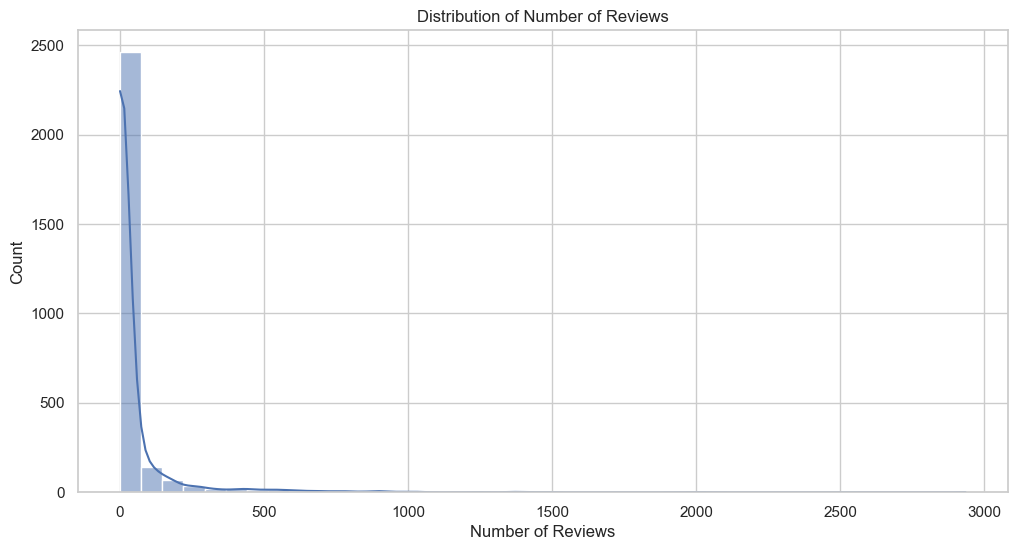

In [22]:
sns.histplot(df['no_of_reviews'], bins=40, kde=True)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.show()

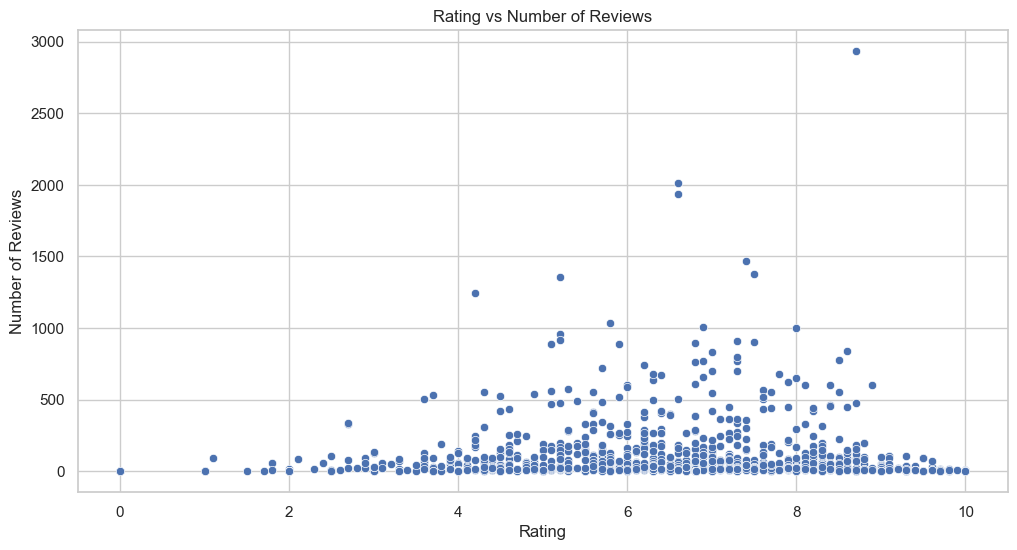

In [23]:
sns.scatterplot(x='rating', y='no_of_reviews', data=df)
plt.title("Rating vs Number of Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

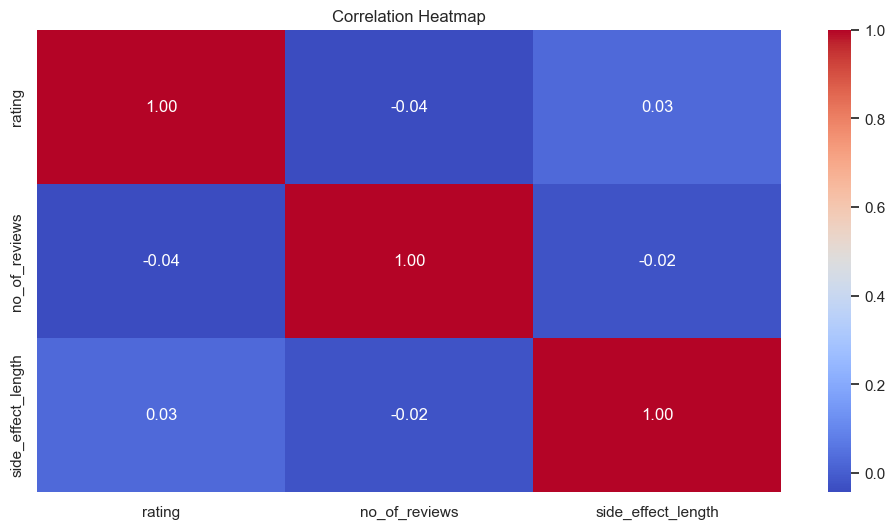

In [24]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()